In [1]:
import pandas as pd
import matplotlib as plt
import re
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
lo=fb[fb.page_name=="林淑芬"]
lo.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
20051,169014523134260_2030287527006941,169014523134260,林淑芬,政治人物,NaN,NaN,link,https://www.facebook.com/169014523134260/posts...,2019-01-15T11:26:05+0000,2019-01-15T19:26:05,...,滕西華／缺乏受害救濟、回饋制度，再生醫療條例造福的是誰？ - 報導者 The Reporter,再生醫療將成台灣產業新亮點？醫藥技術可行，不代表著社會倫理同樣可行。這是目前對《再生醫療條例...,139,0,0,0,0,0,5,1


In [5]:
#爬到的最後一篇
lo[lo.created_time_taipei == max(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
20280,169014523134260_2675697385799282,169014523134260,林淑芬,政治人物,｜感謝有您！｜\r\n\r\n今天有個民眾拍拍我的手，\r\n對我說，\r\n「加油，請你繼...,NaN,photo,https://www.facebook.com/169014523134260/posts...,2020-01-10T11:46:45+0000,2020-01-10T19:46:45,...,NaN,NaN,3196,0,0,0,0,0,117,16


In [6]:
#爬到的最後一篇
lo[lo.created_time_taipei == min(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
20070,169014523134260_2008891369146557,169014523134260,林淑芬,政治人物,2019\r\n進者 往生極樂；\r\n退者 無間地獄！！\r\n前進、前進、再前進。,NaN,photo,https://www.facebook.com/169014523134260/posts...,2018-12-31T16:26:41+0000,2019-01-01T00:26:41,...,NaN,NaN,846,0,0,0,0,0,37,2


In [7]:
#讓我們來做個時間排序吧
lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
lo['post_hour']=pd.to_datetime(lo['created_time_taipei']).dt.hour
lo.head(1)

<ipython-input-7-793464da8639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
<ipython-input-7-793464da8639>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
<ipython-input-7-793464da8639>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
20051,169014523134260_2030287527006941,169014523134260,林淑芬,政治人物,NaN,NaN,link,https://www.facebook.com/169014523134260/posts...,2019-01-15T11:26:05+0000,2019-01-15T19:26:05,...,0,0,0,0,0,5,1,2019-01-15,2019-01,19


In [8]:
#整個月份的總量
results = lo.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,6253537355967620,46484,0,0,0,0,0,1860,3078,512
2019-02,3718319508953720,27645,0,0,0,0,0,1018,2284,327
2019-03,4225363078356500,49684,0,0,0,0,0,2329,2238,402
2019-04,4056348555222240,44767,0,0,0,0,0,3158,1636,386
2019-05,1521130708208340,13872,0,0,0,0,0,1414,351,150
2019-06,2366203323879640,19358,0,0,0,0,0,573,1040,196
2019-07,1352116185074080,11006,0,0,0,0,0,360,1375,116
2019-08,1183101661939820,6228,0,0,0,0,0,346,326,91
2019-09,1690145231342600,11026,0,0,0,0,0,490,1186,145


In [9]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,6253537355967620,46484,0,0,0,0,0,1860,3078,512
1,2019-02,3718319508953720,27645,0,0,0,0,0,1018,2284,327
2,2019-03,4225363078356500,49684,0,0,0,0,0,2329,2238,402
3,2019-04,4056348555222240,44767,0,0,0,0,0,3158,1636,386
4,2019-05,1521130708208340,13872,0,0,0,0,0,1414,351,150
5,2019-06,2366203323879640,19358,0,0,0,0,0,573,1040,196
6,2019-07,1352116185074080,11006,0,0,0,0,0,360,1375,116
7,2019-08,1183101661939820,6228,0,0,0,0,0,346,326,91
8,2019-09,1690145231342600,11026,0,0,0,0,0,490,1186,145
9,2019-10,2873246893282420,15011,0,0,0,0,0,702,1542,280


In [10]:
results['newhead'].map(str)

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

In [11]:
#發文時間分佈
post_time = lo[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,6
1,1,1
2,7,5
3,8,21
4,9,23
5,10,14
6,11,11
7,12,19
8,13,16
9,14,12


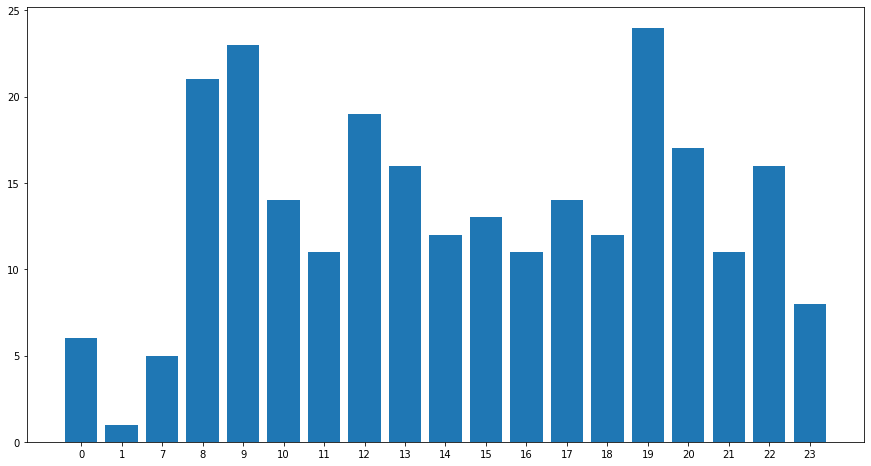

In [12]:
# 以圖表呈現時間分佈
import matplotlib.pyplot as plt

labels = post_time['post_hour'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, post_time['post_id'])

plt.show()

In [13]:
#整年貼文數量分佈
whole_year = lo[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,37
1,2019-02,22
2,2019-03,25
3,2019-04,24
4,2019-05,9
5,2019-06,14
6,2019-07,8
7,2019-08,7
8,2019-09,10
9,2019-10,17


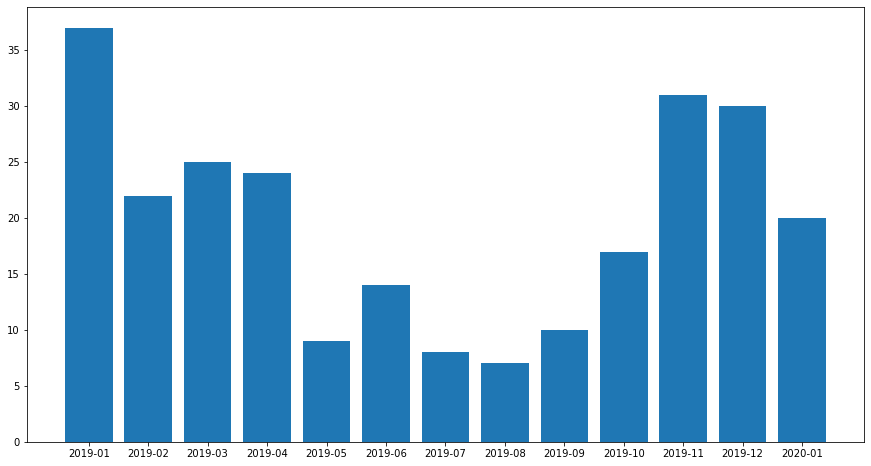

In [14]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.bar(labels, whole_year['post_id'])

plt.show()

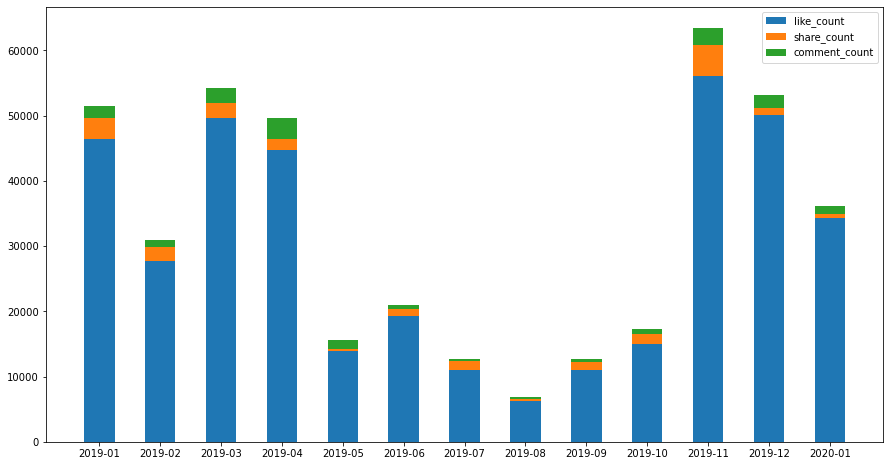

In [15]:
#按讚、分享、留言分佈
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

No handles with labels found to put in legend.


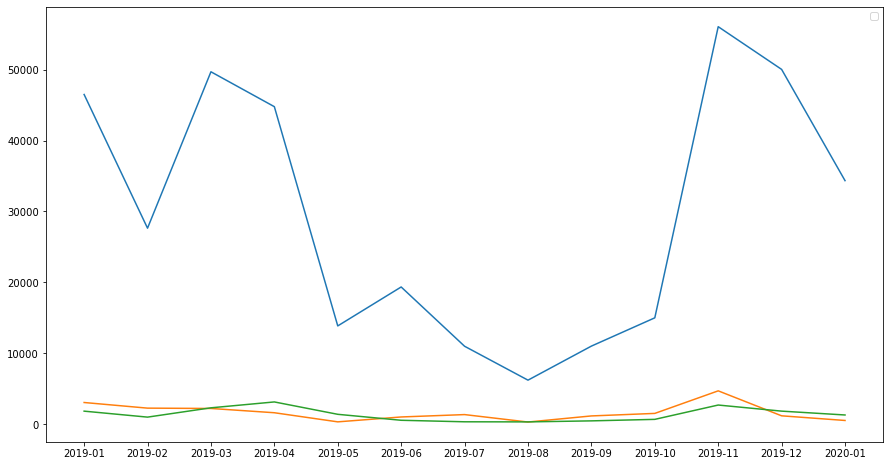

In [16]:
#個別攤開以折線檢視
labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results['like_count'])
ax.plot(labels, results['share_count'])
ax.plot(labels, results['comment_count'])

ax.legend()

plt.show()

In [17]:
Mar = lo[lo.month_year == "2019-03"]

In [18]:
results_Mar  = Mar.groupby('new_date').sum()
results_Mar.index.name = 'new_date'
results_Mar.reset_index(inplace=True)
results_Mar

,new_date,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-03-01,169014523134260,1361,0,0,0,0,0,43,226,13
1,2019-03-04,169014523134260,1491,0,0,0,0,0,76,32,18
2,2019-03-07,338029046268520,2544,0,0,0,0,0,148,131,39
3,2019-03-08,169014523134260,714,0,0,0,0,0,21,3,13
4,2019-03-11,507043569402780,1855,0,0,0,0,0,67,53,48
5,2019-03-12,169014523134260,454,0,0,0,0,0,114,2,16
6,2019-03-13,169014523134260,3270,0,0,0,0,0,141,306,13
7,2019-03-15,169014523134260,2116,0,0,0,0,0,68,16,22
8,2019-03-16,338029046268520,5413,0,0,0,0,0,231,157,30
9,2019-03-17,169014523134260,8245,0,0,0,0,0,472,204,8


No handles with labels found to put in legend.


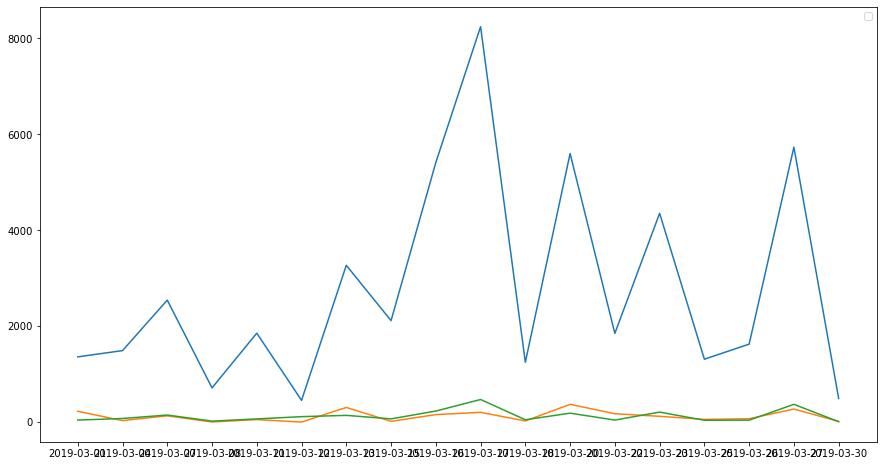

In [27]:
#畫圖 看整個月按讚、分享、評論的流量
labels = results_Mar['new_date'].map(str)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_Mar['like_count'])
ax.plot(labels, results_Mar['share_count'])
ax.plot(labels, results_Mar['comment_count'])

ax.legend()

plt.show()

In [28]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-03-17"]

<ipython-input-28-2c384f40aa84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
20134,169014523134260_2117098031659223,169014523134260,林淑芬,政治人物,【淑芬將為三重、蘆洲、五股地區鄉親，參選「區域立委」到底！】\r\n\r\n過去一段時間，\...,NaN,photo,https://www.facebook.com/169014523134260/posts...,2019-03-17T00:50:56+0000,2019-03-17T08:50:56,...,0,0,0,0,0,472,204,2019-03-17,2019-03,8


## 林淑芬參選「區域立委」
https://www.facebook.com/linshufen.fans/posts/2117098031659223?comment_id=2117114301657596